In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/road_data.csv')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [7]:
df = df.drop(range(910,919))
df.fillna(0,inplace=True)

In [8]:
j=0
for i in range(100):
  df.iloc[j:j+10,0] = df.iloc[j,0]
  j += 10

In [9]:
test = df.loc[df['year']==10]

In [10]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Group')
test.columns = test.columns.str.replace('Unnamed: 0', 'Group')
df.head(10)

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [11]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [21]:
RFpred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
name = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
ETRpred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [23]:
rfRMSE = []
N = 0
index = 0

In [26]:
for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]
  
                #Appending Results
                
                RFpred[name[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            rfRMSE.append(ans)
            index += 1

In [28]:
print("Total RMSE : ",((sum(rfRMSE)/N))**0.5)

Total RMSE :  46.264685779094926


In [29]:
etr = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=200,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, verbose=0,
                    warm_start=False)

In [30]:
etrRMSE = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
    ans = 0
    count = 0
    for i in range(0, 1000, 10):
        xtrain = df.iloc[i:i+9, 1:10]
        ytrain = df.iloc[i:i+9, j]
        xtest = df.iloc[i+9, 1:10].to_numpy()
        ytest = df.iloc[i+9, j]
        etr.fit(xtrain, ytrain)

        ypred = etr.predict(xtest.reshape(1,-1))[0]

        ETRpred[name[index]].append(ypred)
        ans += (ytest - ypred)**2
        count += 1
        N += 1

    etrRMSE.append(ans)
    index += 1

In [31]:
print("Total RMSE : ",((sum(etrRMSE)/N))**0.5)

Total RMSE :  42.79779731832746


etr RMSE is better than random forest regressor rmse

In [33]:
# fetching random rows for plotting
import random
rows=[]
for i in range(30):
  rows.append(random.randint(0,90))

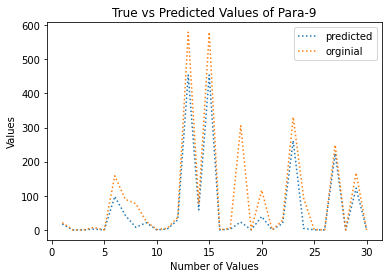

In [34]:
true_value = test.iloc[rows,10]
true_value
predicted_value = pd.Series(ETRpred['Para-9']).iloc[rows]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')
plt.show()

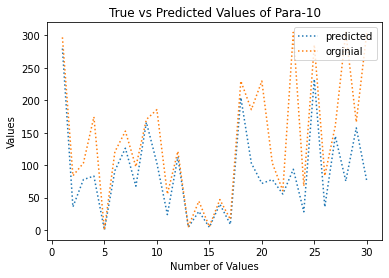

In [35]:
true_value = test.iloc[rows,11]
true_value
predicted_value = pd.Series(ETRpred['Para-10']).iloc[rows]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')
plt.show()

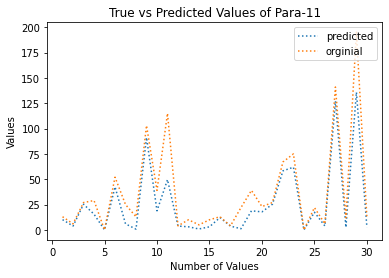

In [36]:
true_value = test.iloc[rows,12]
true_value
predicted_value = pd.Series(ETRpred['Para-11']).iloc[rows]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')
plt.show()

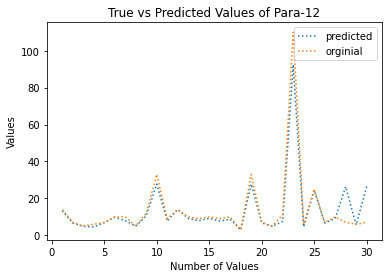

In [37]:
true_value = test.iloc[rows,13]
true_value
predicted_value = pd.Series(ETRpred['Para-12']).iloc[rows]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')
plt.show()

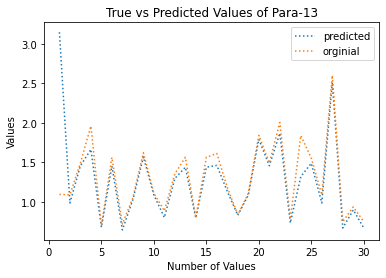

In [38]:
true_value = test.iloc[rows,14]
true_value
predicted_value = pd.Series(ETRpred['Para-13']).iloc[rows]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')
plt.show()